<a href="https://www.kaggle.com/code/mohamedabidi97/e-commerce-investigate-the-data-thoroughly?scriptVersionId=113449639" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://github.com/mohamedabidi97/customer-segmentation-online-retail/blob/main/assets/notebook-cover.png?raw=true"></img>

### Context:
Online retailing is growing at an astonishing rate, with online sales now accounting for around one-quarter of the total retail market. Retailers who ignore e-commerce may see their trade lessening as customers continue to shift to ordering products online.

The benefits of retailing online include:

-     Easy access to market - in many ways the key to market for entrepreneurs has never been easier. Online marketplaces such as eBay and Amazon allow anyone to set up a simple online shop and sell products within minutes.
-  Reduced overheads - selling online can remove the need for expensive retail premises and customer-facing staff, allowing you to invest in better marketing and customer experience on your e-commerce site.
- Potential for rapid growth - selling on the internet means traditional constraints to retail growth - eg finding and paying for larger - are not significant factors. With a good digital marketing strategy and a plan a scale up order fulfillment systems, you can respond and boost growing sales.
- Widen your market/export - one major advantage over premises-based retailers is the ability to expand your market beyond local customers very quickly. You may discover a strong demand for your products in other countries which you can respond to by targeted marketing, offering your website in a different language, or perhaps partnering with an overseas company.
-    Customer intelligence - ability to use online marketing tools to target new customers and website analysis tools to gain insight into your customers' needs. 


### <mark><font style="color: #192b59"><b>Data understanding</b></font></mark>
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

#### 📌 Attribute Information:
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides. 

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import seaborn as sns

# Text color
from termcolor import colored

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Used functions
class Bold:
   START = '\033[1m'
   END = '\033[0m'

# First look on the dataset
def hello_data():
    print("-"*20)
    print(colored("Shape of the dataset", "magenta", attrs=['bold']))
    print("-"*20)
    print(str(df.shape) + "\n")
    print(colored("Columns of the dataset", "magenta", attrs=['bold']))
    print("-"*20)
    print(str(df.columns.to_list()) + "\n")
    print(colored("Data duplication ", "magenta", attrs=['bold']))
    print("-"*20)
    print(str(df.duplicated(keep=False).sum()) + "\n")
    print(colored("Missing Values", "magenta", attrs=['bold']))
    print("-"*20)
    print(str(df.isnull().sum()) + "\n")
    print(colored("Unique Values", "magenta", attrs=['bold']))
    print("-"*20)
    print(str(df.nunique()) + "\n")
    print(colored("Columns info", "magenta", attrs=['bold']))
    print("-"*20)
    print(str(df.info()) + "\n")
    print("-"*20)


This is the color palettes of this notebook



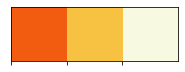

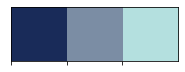

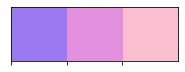

In [3]:
colors = ["#f25c11", '#f7c141', '#f7f9e0', '#192b59', '#7b8da4', '#b4e0df', '#9b79f1', '#e391de', '#f9bfce']
print(Bold.START + "This is the color palettes of this notebook" + Bold.END + "\n")
sns.palplot(sns.color_palette(colors[:3]))
sns.palplot(sns.color_palette(colors[3:6]))
sns.palplot(sns.color_palette(colors[6:]))

## 1. Initial look on the data

In [4]:
df = pd.read_csv("/kaggle/input/ecommerce-data/data.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df[df["InvoiceNo"] == "C541433"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom


The dataset's first lines are for the customer identification number (17850), and each row represents a product with its quantity and unit price.

In [6]:
hello_data()

--------------------
Shape of the dataset
--------------------
(541909, 8)

Columns of the dataset
--------------------
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Data duplication 
--------------------
10147

Missing Values
--------------------
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Unique Values
--------------------
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Columns info
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   Stock

🛒 - 8 columns with <mark><font style="color: #192b59"><b>541909</b></font></mark> rows.

🛒 - Invoice Date is an object Dtype not datetime!

🛒 - Why the customer id Dtype is float?

🛒 - The dataset contains customers from <mark><font style="color: #192b59"><b>38 countries</b></font></mark>, that's really interesting!

🛒 - <mark><font style="color: #192b59"><b>CustomerID</b></font></mark> field has a lot of missing values, which is strange!


In [7]:
missing_percentage = df.isnull().sum() / df.shape[0] * 100
print(colored("Percentage of missing Values", "magenta", attrs=['bold']))
missing_percentage.sort_values(ascending=False)

Percentage of missing Values


CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

🛒 - Data loss can occur for a variety of reasons, including incorrect data entry, device failures, lost files, and more.
Every dataset typically contains some missing data. 

🛒 - Almost 25% of the Customer Ids in this dataset are missing, which is odd considering that each row represents a transaction and should have a Customer Id. 


## 2.Time to clean the data, shall we? 

In [8]:
df[["Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


🛒- Quantity minimum and unit price are both negative!

🛒- The dataset's outliers may be the root reason. 

In [9]:
df.loc[df.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe().T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,135080.0,8.076577,151.900816,-11062.06,1.63,3.29,5.45,17836.46
Quantity,135080.0,1.995573,66.696153,-9600.00,1.00,1.00,3.00,5568.00


🛒 - Negative data for Quantity and UnitPrice are among the missing rows for Customers Id.



In [10]:
missing_desc = df.loc[df.Description.isnull()]
missing_desc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


🛒 - We appear to have identical rows where the Customer ID and Description are missing. In addition, I noted that the unit price is 0.0, which is incorrect. 

In [11]:
df.loc[(df.Description.isnull()) & (df.Description.isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


🛒 - 1454 Rows have missing value in both Description and Customer id.

Let's check the unit price

In [12]:
missing_desc.UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

🛒 - This is what we anticipated, thus those 1454 records are invalid and contain missing values and incorrect values.

🛒 - Removing those rows is the best option. 

In [13]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df[["Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0


In the dataset, still some prices are 0, which is erroneous. 


In [15]:
df = df[df.UnitPrice != 0.0]
df[["Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406789.0,12.028359,247.927842,-80995.000,2.00,5.00,12.00,80995.0
UnitPrice,406789.0,3.460811,69.318561,0.001,1.25,1.95,3.75,38970.0


Let's see whether there are any empty strings or nan values. 

In [16]:
# nan values check
nan_description = df['Description'].str.contains('nan').sum()
nan_stock = df['StockCode'].str.contains('nan').sum()
nan_invoice = df['InvoiceNo'].str.contains('nan').sum()
print( "{} 'nan' exists in the dataframe.".format(nan_description+nan_stock+nan_invoice))

0 'nan' exists in the dataframe.


In [17]:
# Empty strings check
empty_description = df[~df.Description.str.contains('\w')].Description.count()
empty_stock = df[~df.Description.str.contains('\w')].Description.count()
empty_invoice = df[~df.Description.str.contains('\w')].Description.count()
print( "{} 'Empty String' exists in the dataframe.".format(empty_description+empty_stock+empty_invoice))

0 'Empty String' exists in the dataframe.


#### Some of orders are cancelled? Now let's look at the number. 

<mark><font style="color: #192b59"><b>Reminder:</b></font></mark> Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

Therefore, if an invoice number begins with the letter "c", it has been canceled ❌. 

In [18]:
df['canceled'] = list(map(lambda x: 'C' in str(x), df['InvoiceNo']))
canceled_orders = df[df['canceled'] == True]
canceled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True


In [19]:
display(canceled_orders[["Quantity", "UnitPrice"]].describe().T)
print(colored("Shape of cancelled orders dataframe", "magenta", attrs=['bold']) + "\n" + str(canceled_orders.shape))

,count,mean,std,min,25%,50%,75%,max
Quantity,8905.0,-30.859966,1170.154939,-80995.00,-6.00,-2.00,-1.00,-1.0
UnitPrice,8905.0,18.845519,444.366043,0.01,1.45,2.95,4.95,38970.0


Shape of cancelled orders dataframe
(8905, 9)


🛒 - 8905 canceled orders with a negative quantity, therefore it may be due to some incorrect invoicing or anything else. 

Let's see if there are any additional orders with a negative quantity. 

In [20]:
df[df['Quantity'] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,True
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,True


We will drop all columns with negative Quantity values

In [21]:
df = df[df['Quantity'] > 0 ]
df[["Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397884.0,12.988238,179.331775,1.000,2.00,6.00,12.00,80995.00
UnitPrice,397884.0,3.116488,22.097877,0.001,1.25,1.95,3.75,8142.75


## 3. Let's examine the data more closely. 

Let's know more about several stock codes, which are letters like "M" and "C." 

In [22]:
df[df["StockCode"] == "M"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom,False
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274.0,United Kingdom,False
6798,536981,M,Manual,2,12/3/2010 14:26,0.85,14723.0,United Kingdom,False
7976,537077,M,Manual,12,12/5/2010 11:59,0.42,17062.0,United Kingdom,False
8530,537137,M,Manual,36,12/5/2010 12:43,0.85,16327.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
526015,580645,M,Manual,1,12/5/2011 13:11,219.50,17857.0,United Kingdom,False
526018,580646,M,Manual,800,12/5/2011 13:13,0.25,17857.0,United Kingdom,False
530876,580884,M,Manual,1,12/6/2011 12:21,0.85,15907.0,United Kingdom,False
531432,580956,M,Manual,4,12/6/2011 14:23,1.25,17841.0,United Kingdom,False


🛒 - As stated in the description column, M is probably an invoice that was created by hand ( Manually ).

🛒 - This type of invoice must be filled by the sender and sent to the customer by attaching it to an email.


In [23]:
special_stock_code = df[df['StockCode'].apply(lambda x: len(x) == 1)]
special_stock_code.StockCode.value_counts()

M    284
Name: StockCode, dtype: int64

🛒 - After the data has been cleaned, we just have "M." 

#### Time Period

In [24]:
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate, cache=True)
print (Bold.START + "Start: " + Bold.END + str(df.InvoiceDate.min()))
print (Bold.START + "End: " + Bold.END + str(df.InvoiceDate.max()))
print (Bold.START + "Period: " + Bold.END + str(df.InvoiceDate.max() - df.InvoiceDate.min()))

Start: 2010-12-01 08:26:00
End: 2011-12-09 12:50:00
Period: 373 days 04:24:00


#### Let's take a look on countries 

In [25]:
countries = df['Country'].value_counts(normalize=True)
countries[:5]

United Kingdom    0.890513
Germany           0.022720
France            0.020963
EIRE              0.018186
Spain             0.006243
Name: Country, dtype: float64

🛒 - Since the dataset is about UK-based orders, it is typical that about 90% of orders come from there. 

In [26]:
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names', z = countries,
            text = countries.index, colorbar = {'title':'Order num.'},
            colorscale=colors[::-1],    
            reversescale = False)

layout = dict(title='Total number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

#### Check the number of clients we have here

In [27]:
print(colored("Total number of clients", "magenta", attrs=['bold']) + "\n" + str(df["CustomerID"].nunique()))

Total number of clients
4338


#### Total number of products sold

In [28]:
print(colored("Total number of Products", "magenta", attrs=['bold']) + "\n" + str(df["StockCode"].nunique()))

Total number of Products
3665


#### Which product sold the most is the most pressing query 😃

In [29]:
most_sold = df.groupby(['StockCode'])['Quantity'].sum().reset_index()
most_sold = most_sold.sort_values(by=["Quantity"], ascending=False)

# Plotly bar plot
fig = px.bar(most_sold.head(10), x='StockCode', y='Quantity', color='Quantity', 
             color_continuous_scale=colors[:3:-1], text_auto='.2s',
             title = "Best Selling Item Stock Code ")
fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)
fig.update_layout(plot_bgcolor= 'white')

fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/mohamedabidi97/customer-segmentation-online-retail/main/assets/image_01.png",
        xref="paper", yref="paper",
        y=1.4, x=0.5,
        opacity= 0.7,
        sizex=1, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()


In [30]:
display(df[df["StockCode"] == "23843"].head(1))
display(df[df["StockCode"] == "23166"].head(1))
display(df[df["StockCode"] == "84077"].head(1))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,False


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,False


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
3259,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:09:00,0.29,14047.0,United Kingdom,False


> 📌 If I'm mistaken about the product image, please correct me 🤔. The most popular items in our dataset are those. 

<center><img src="https://raw.githubusercontent.com/mohamedabidi97/customer-segmentation-online-retail/main/assets/best_selling.png"></img></center>

#### Let's look at the monthly sales revenue of every product throughout this time. 

In [31]:
# Create revenue column 
df["Revenue"] = df["UnitPrice"] * df["Quantity"]

In [32]:
# Choose the product id 
PRODUCT_CODE = ""

if PRODUCT_CODE:
    invoices_product = df[df["StockCode"] == PRODUCT_CODE]
    month_sales = invoices_product.groupby(invoices_product['InvoiceDate'].dt.strftime('%B'))['Quantity', 'Revenue'].sum().reset_index()
    order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month_sales = month_sales.sort_values('InvoiceDate', key = lambda x : pd.Categorical(x, categories=order_months, ordered=True))
    plot_title = "Monthly Revenue of product: {} ".format(PRODUCT_CODE)
else:
    # Per default, take all products
    month_sales = df.groupby(df['InvoiceDate'].dt.strftime('%B'))['Quantity', 'Revenue'].sum().reset_index()
    order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month_sales = month_sales.sort_values('InvoiceDate', key = lambda x : pd.Categorical(x, categories=order_months, ordered=True))
    plot_title = "Monthly Total Revenue"

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=month_sales["InvoiceDate"], y=month_sales["Revenue"], name='Revenue',
                         line=dict(color=colors[8], width=5)))
fig.update_layout(plot_bgcolor= 'white')

fig.update_layout(title_text=plot_title, 
                  title_font=dict(size=20, color="black", family="Arial"),
                    title_font_color="black")

fig.show()

🛒 - To view each month's revenue, move your cursor 🖱️ over the graphic. 

🛒 - The best selling months are October, November, and December since the revenue rises month after month throughout the year. 

🛒 - The graphic indicates that the revenue is completely unstable throughout the year, with a differential of more than x2 between months with lower and higher revenue. 

🛒 - Since most individuals in the UK consider themselves to be "Christian," this might be connected to Christmas 🎅, when many gifts are bought. Possibly a cause 




📌 - The store needs to implement a plan to boost sales at the beginning of the year. 

📌 - Spend time and resources on acquiring new customers but keep your loyal customers happy.

📌 - Establishing trust with your customers is key to ultimately persuading them to purchase what you’re selling. Even in an increasingly virtual world, there are many ways to connect with your customers, establish trust, and gain influence.

# Work in progress...